In [3]:
## Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.constraints import MaxNorm, MinMaxNorm, NonNeg
from sklearn.metrics import accuracy_score, confusion_matrix




In [4]:
## Importing the dataset
dataset = pd.read_csv("Churn_Modelling (1).csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
## SEPERATING THE INDEPENDENT AND DEPENDENT VARIABLES
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [8]:
## FEATURE ENGINEERING FOR CREATING DUMMY VARIABLES

geo = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

## CONVERTING THE BOOLEANS TO INTEGER TYPE (0 AND 1)
geo = geo.astype(int)
gender = gender.astype(int)
print(geo)
print(gender)


      Germany  Spain
0           0      0
1           0      1
2           0      0
3           0      0
4           0      1
...       ...    ...
9995        0      0
9996        0      0
9997        0      0
9998        1      0
9999        0      0

[10000 rows x 2 columns]
      Male
0        0
1        0
2        0
3        0
4        0
...    ...
9995     1
9996     1
9997     0
9998     1
9999     0

[10000 rows x 1 columns]


In [9]:
## DROPPING THE ORIGINAL 2 CATEGORICAL COLUMNS
X = X.drop(['Geography','Gender'], axis = 1)
X.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [10]:
## CONCATENATING THE DUMMY VARIABLES WITH THE DATAFRAME
X = pd.concat([X, geo, gender], axis = 1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [11]:
## SPLITTING THE DATASET INTO TRAINING  AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
## FEATURE SCALING
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(8000, 11)
(2000, 11)


In [13]:
## INITIALISING THE ARTIFICIAL NEURAL NETWORK(ANN)

classifier = Sequential()

In [14]:
## ADDING THE INPUT LAYER
classifier.add(Dense(units = 11,kernel_constraint=MaxNorm(0.5), bias_constraint=MaxNorm(0.3), kernel_initializer = 'glorot_uniform', bias_initializer = 'glorot_uniform',  activation = 'relu' ))

In [15]:
## ADDING THE FIRST HIDDEN LAYER
classifier.add(Dense(units = 20,kernel_constraint=MinMaxNorm(min_value=0.5, max_value=0.7), bias_constraint=MinMaxNorm(min_value=0.3, max_value = 0.4), kernel_initializer = 'he_uniform', bias_initializer = 'he_uniform', activation ='relu'))
classifier.add(Dropout(0.4))

In [16]:
## ADDING THE SECOND HIDDEN LAYER
classifier.add(Dense(units = 7,kernel_constraint=NonNeg(), bias_constraint=NonNeg(), kernel_initializer = 'random_normal', bias_initializer = 'random_normal',activation = 'relu'))
classifier.add(Dropout(0.3))

In [17]:
## ADDING THE OUTPUT LAYER
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [18]:
## DEFINIG THE LEARNING RATE SEPARATELY FOR THE ADAM OPTIMIZER
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)

In [19]:
## COMPILING THE MODEL
classifier.compile(optimizer = opt, loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
## DEFINING THE EARLY STOPPING OF THE TRAINING PROCESS OF THE ANN
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [21]:
## TRAINING THE NEURAL NETWORK
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 1000, callbacks=early_stopping )

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7920 - loss: 0.4966 - val_accuracy: 0.8008 - val_loss: 0.4765
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8014 - loss: 0.4558 - val_accuracy: 0.8152 - val_loss: 0.4415
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8066 - loss: 0.4533 - val_accuracy: 0.8076 - val_loss: 0.4352
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8092 - loss: 0.4404 - val_accuracy: 0.8186 - val_loss: 0.4304
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8150 - loss: 0.4410 - val_accuracy: 0.8148 - val_loss: 0.4306
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8125 - loss: 0.4377 - val_accuracy: 0.8145 - val_loss: 0.4231
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8031 - loss: 0.4496 - val_accuracy: 0.7970 - val_loss: 0.4435
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7938 - loss: 0.4625 - 

In [22]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [23]:
## GETTING THE WEIGHTS
classifier.get_weights()

[array([[-2.00126488e-02, -1.17236741e-01,  9.54255089e-02,
         -7.34824836e-02,  1.03679478e-01,  6.44978583e-02,
         -3.19567434e-02,  2.24917792e-02,  1.23129852e-01,
          2.55508423e-02,  1.87464524e-02],
        [-3.50924700e-01, -1.56354547e-01, -3.03043038e-01,
         -4.41148371e-01, -2.42220595e-01,  6.60522208e-02,
         -4.53667372e-01, -3.41957748e-01, -2.75308639e-01,
         -2.78903991e-01,  7.13256970e-02],
        [ 1.05808452e-01,  4.28956747e-03, -8.08037594e-02,
         -2.75849476e-02, -8.10813084e-02,  1.77364890e-02,
         -1.04461856e-01, -9.50842649e-02,  2.06791121e-03,
          7.83798657e-03,  2.75064427e-02],
        [ 1.53659824e-02,  1.46105275e-01, -1.54806510e-01,
          2.68041529e-02, -8.15962180e-02,  2.53036041e-02,
          5.58325388e-02, -8.27018991e-02, -3.24999303e-01,
          5.06570376e-02, -1.90594211e-01],
        [-2.63914205e-02, -5.69265224e-02,  1.09324846e-02,
         -6.41001835e-02,  8.78477469e-04, -

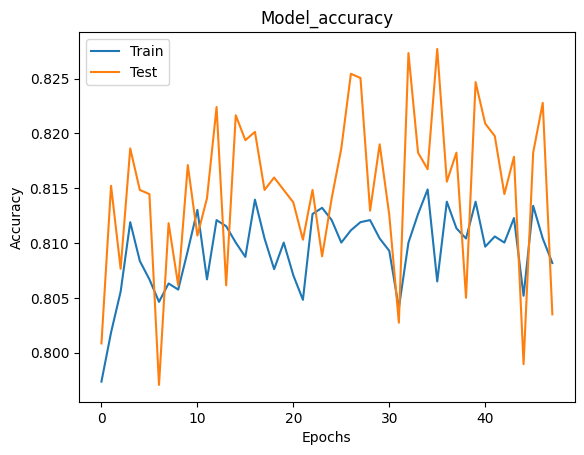

In [24]:
## PLOTTING THE SUMMARIZED HISTORY FOR ACCURACY
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Test'], loc = 'upper left' )
plt.show()

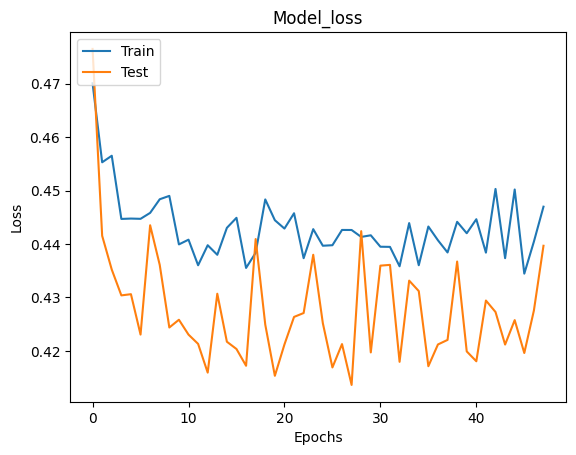

In [25]:
## PLOTTING THE SUMMARIZED HISTORY FOR LOSS
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Test'], loc = 'upper left' )
plt.show()

In [26]:
## MAKING PREDICTIONS FROM THE MODEL
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [27]:
## EVALUATING THE PERFORMANCE OF THE MODEL
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix


array([[1593,    2],
       [ 385,   20]])

In [28]:
## CALCULATING THE ACCURACY
score = accuracy_score(y_pred, y_test)
score

0.8065